In [1]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))

In [4]:
y_train[0]

9

In [5]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" ,  "Ankle boot"]
class_labels

['Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

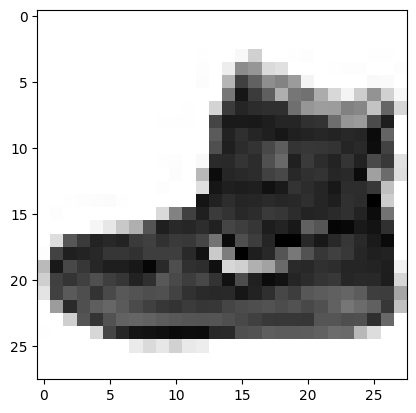

In [8]:
plt.imshow(X_train[0] , cmap="Greys")

Text(0.5, 1.0, 'Bag / 7')

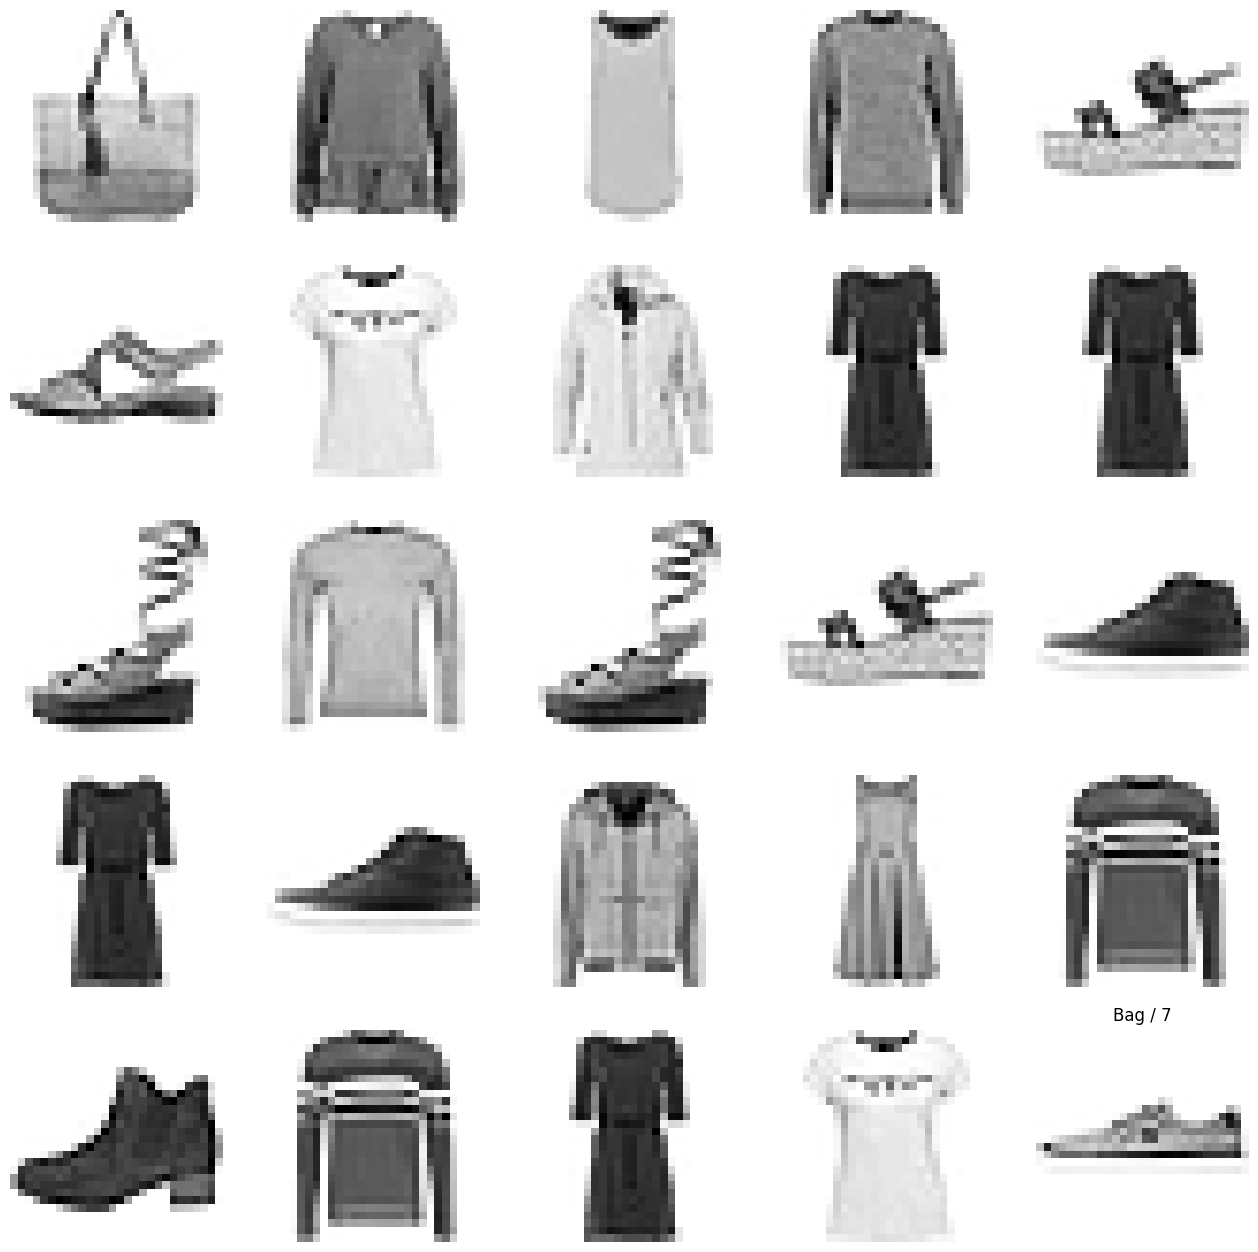

In [21]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,50,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [22]:
X_train. shape

(60000, 28, 28)

In [23]:
X_train.ndim

3

In [24]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [25]:
X_train.ndim

4

In [26]:
X_train =X_train/255
X_test = X_test/255

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [28]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [29]:
cnn = keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])


In [30]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
train = cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 24s 8ms/step - loss: 0.5362 - accuracy: 0.8015 - val_loss: 0.3644 - val_accuracy: 0.8661
Epoch 2/20
3000/3000 [==============================] - 27s 9ms/step - loss: 0.3595 - accuracy: 0.8683 - val_loss: 0.3273 - val_accuracy: 0.8824
Epoch 3/20
3000/3000 [==============================] - 25s 8ms/step - loss: 0.3172 - accuracy: 0.8840 - val_loss: 0.3003 - val_accuracy: 0.8898
Epoch 4/20
3000/3000 [==============================] - 25s 8ms/step - loss: 0.2866 - accuracy: 0.8945 - val_loss: 0.3058 - val_accuracy: 0.8942
Epoch 5/20
3000/3000 [==============================] - 28s 9ms/step - loss: 0.2651 - accuracy: 0.9015 - val_loss: 0.2863 - val_accuracy: 0.9003
Epoch 6/20
3000/3000 [==============================] - 24s 8ms/step - loss: 0.2516 - accuracy: 0.9068 - val_loss: 0.2814 - val_accuracy: 0.8967
Epoch 7/20
3000/3000 [==============================] - 25s 8ms/step - loss: 0.2395 - accuracy: 0.9114 - val_loss: 0.3019 - val_ac

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3151 - accuracy: 0.9069


[0.31512734293937683, 0.9068999886512756]

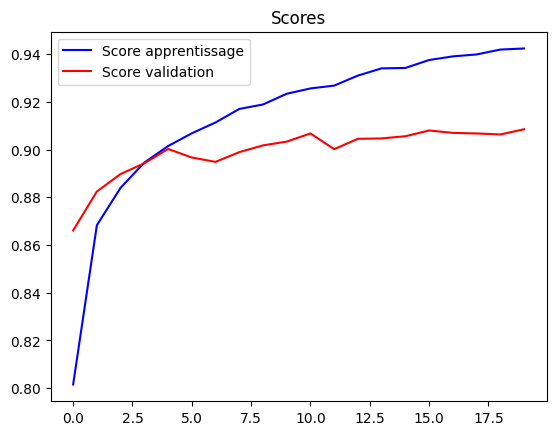

In [33]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()
plot_scores(train)

In [34]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[3.5549460e-21, 2.5938198e-28, 8.1249021e-24, ..., 1.8526199e-06,
        8.9648048e-18, 9.9999809e-01],
       [1.8294129e-05, 4.0143687e-14, 9.9974674e-01, ..., 4.0396802e-24,
        1.3265711e-14, 1.5778392e-24],
       [1.4975858e-30, 1.0000000e+00, 5.4563292e-32, ..., 0.0000000e+00,
        3.9104312e-37, 0.0000000e+00],
       ...,
       [2.2353012e-20, 0.0000000e+00, 1.7411736e-27, ..., 7.2100893e-33,
        1.0000000e+00, 3.5903697e-38],
       [2.6863088e-20, 1.0000000e+00, 2.7022690e-21, ..., 0.0000000e+00,
        5.3381965e-24, 0.0000000e+00],
       [9.9796364e-03, 2.7778030e-03, 4.9036164e-03, ..., 7.6703054e-01,
        1.9713201e-02, 1.2897299e-01]], dtype=float32)

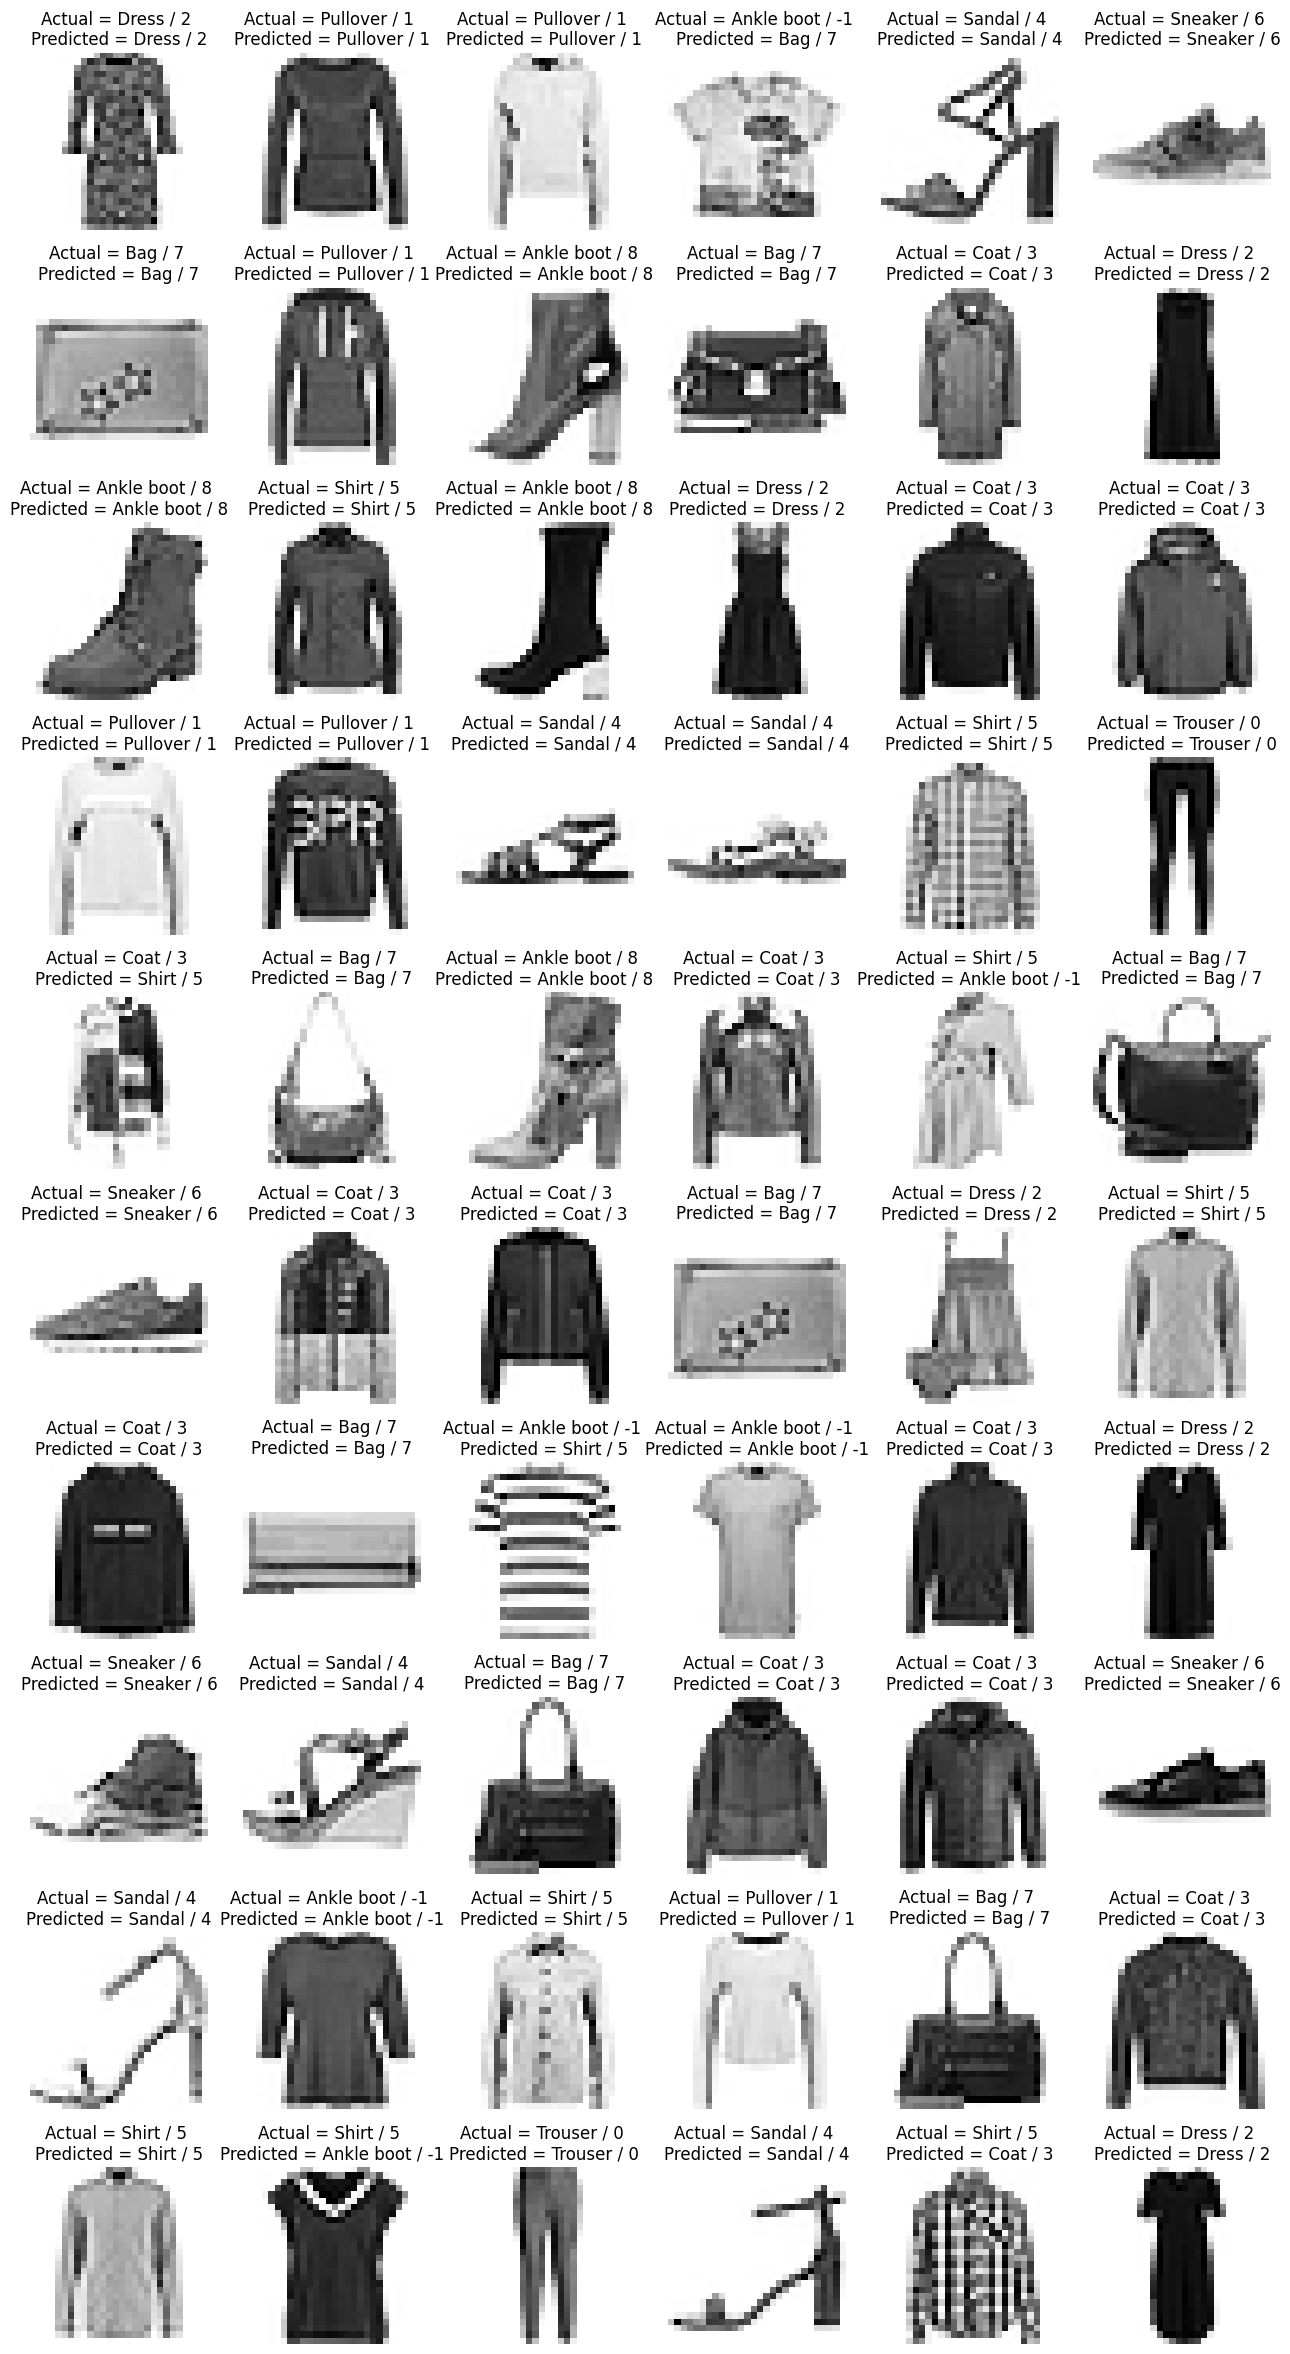

In [40]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]-1], y_test[i]-1, class_labels[np.argmax(y_pred[i])-1],np.argmax(y_pred[i])-1))

<AxesSubplot: >

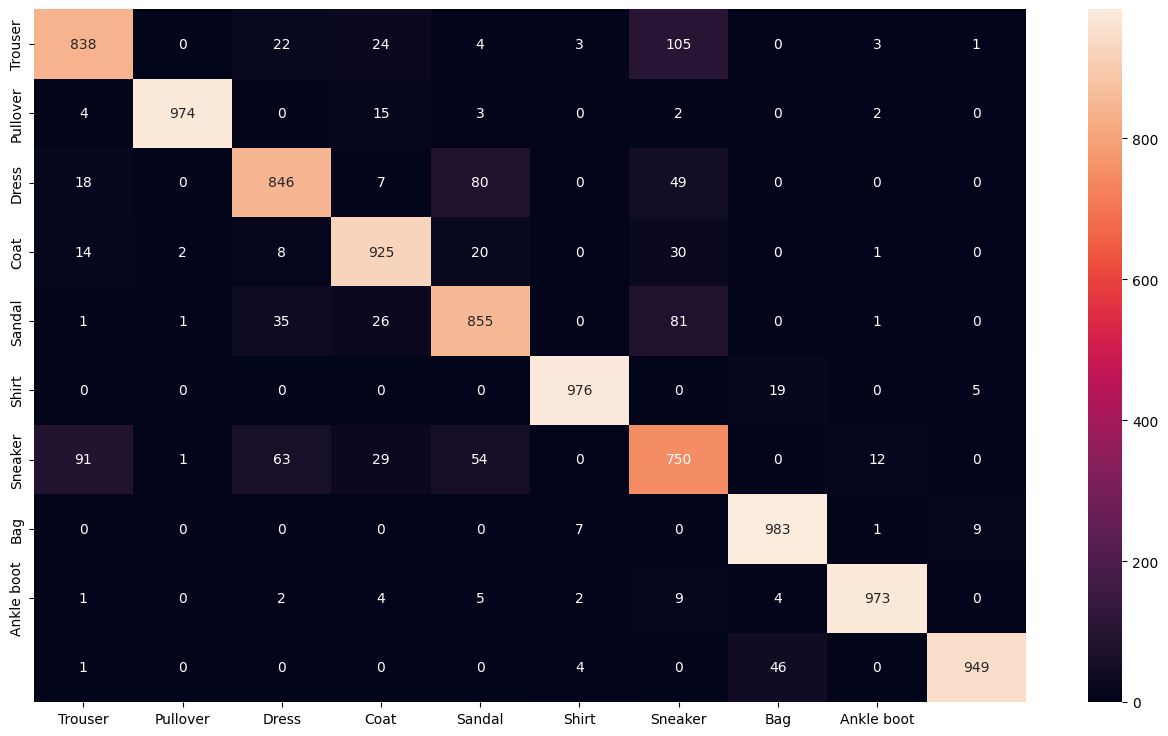

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels=class_labels)

In [42]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

